In [3]:
!sudo apt update >/dev/null 2>&1
!sudo apt install default-jre -y >/dev/null 2>&1
!pip install autogluon language_tool_python textstat >/dev/null 2>&1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.multimodal import MultiModalPredictor
from language_tool_python import LanguageTool
import concurrent.futures
import textstat
from ray import tune

train_data = TabularDataset('data/train.csv')
test_data = TabularDataset('data/test.csv')

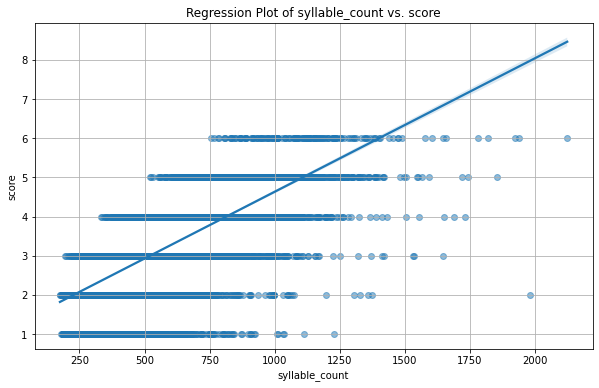

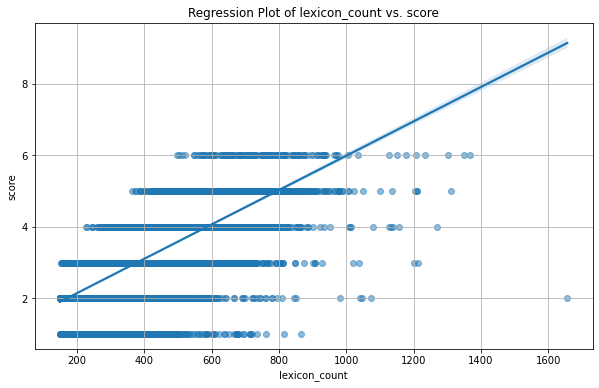

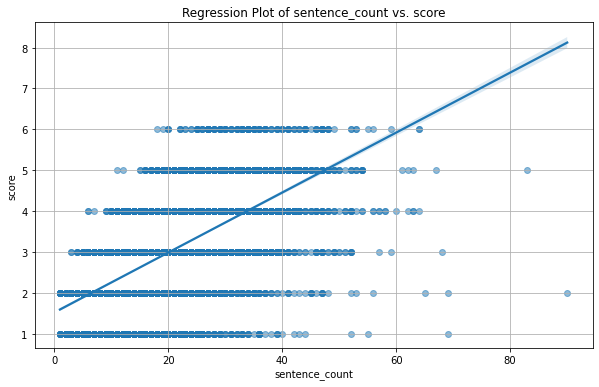

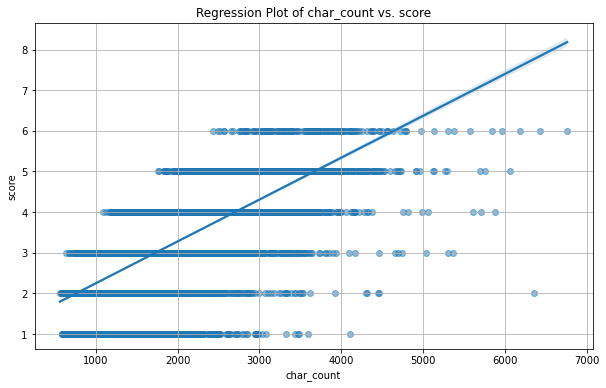

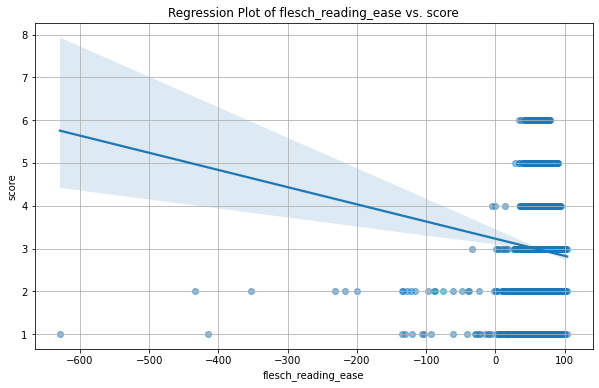

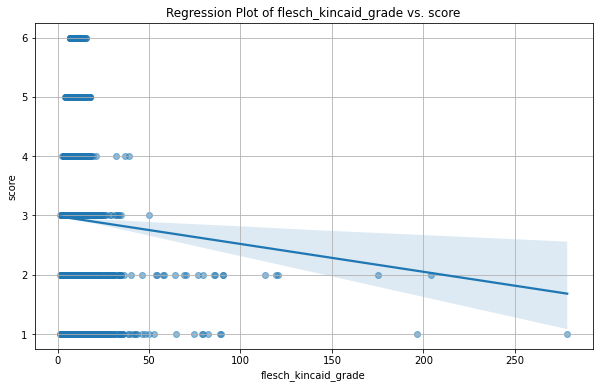

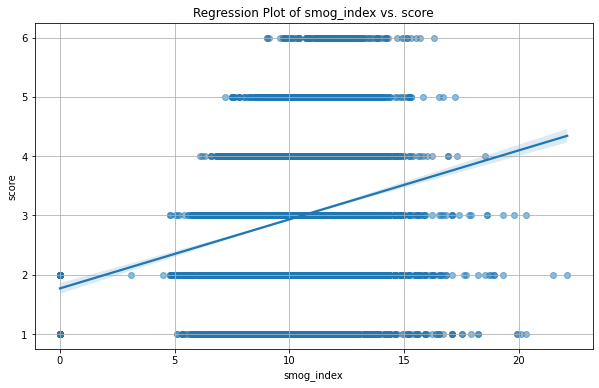

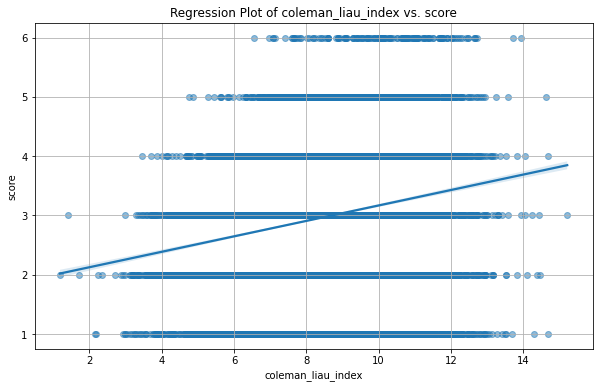

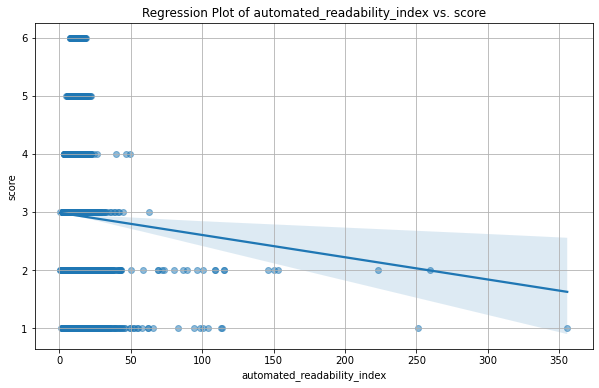

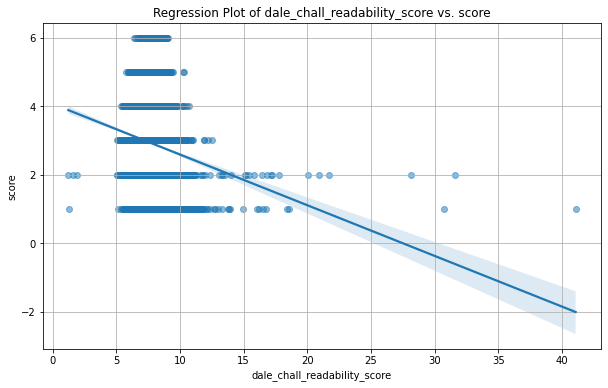

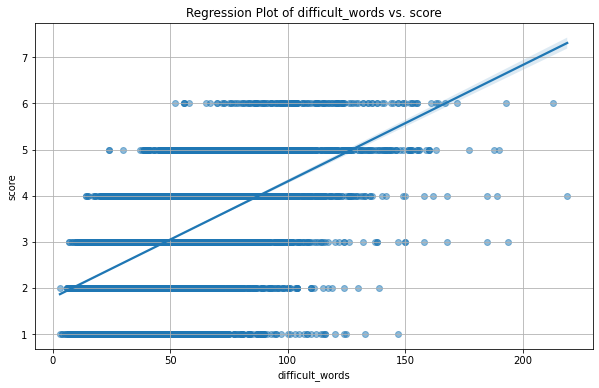

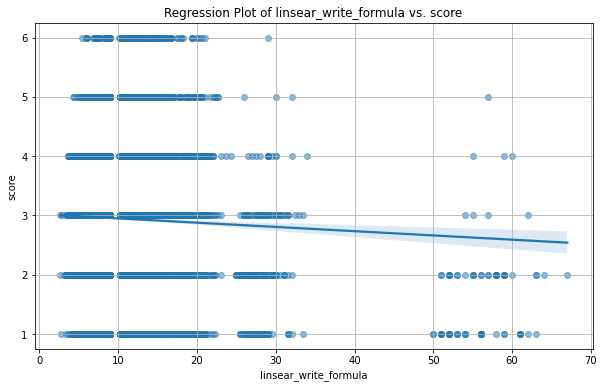

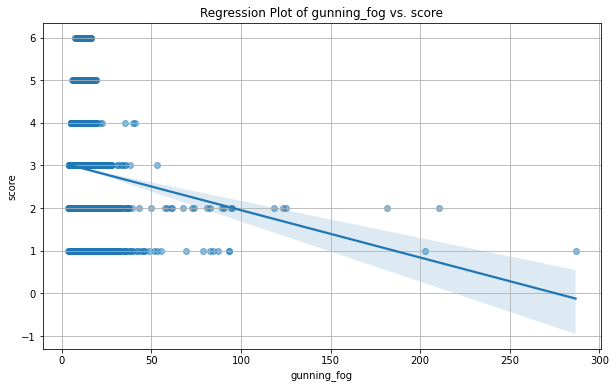

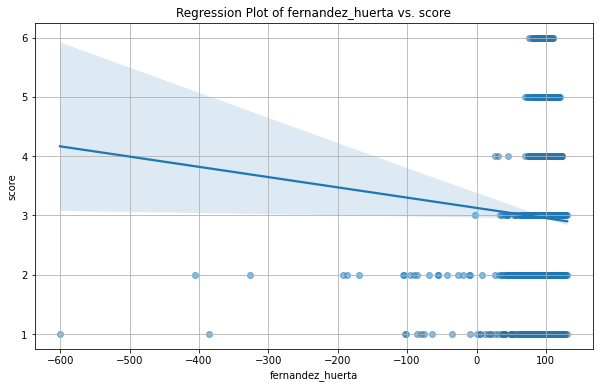

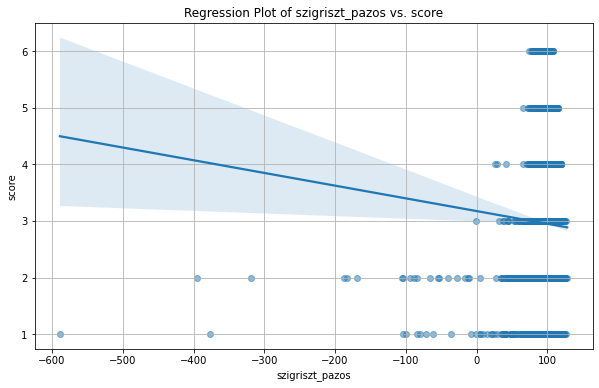

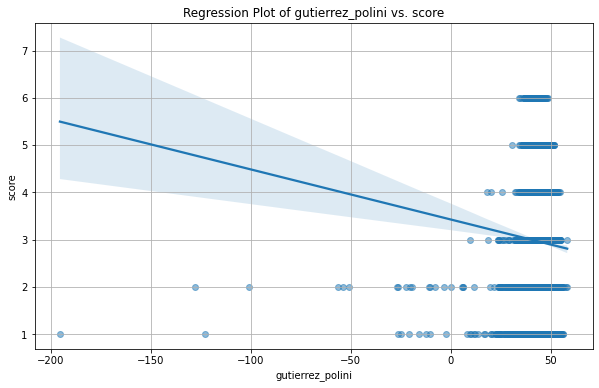

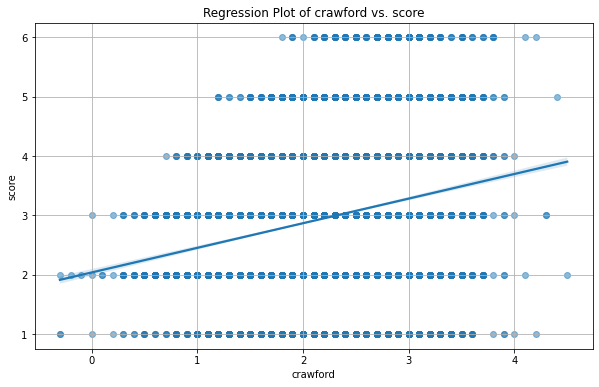

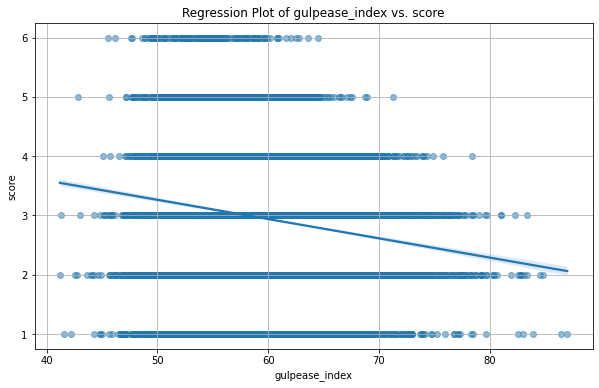

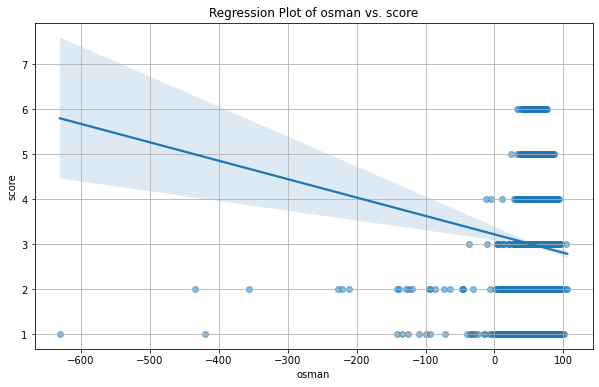

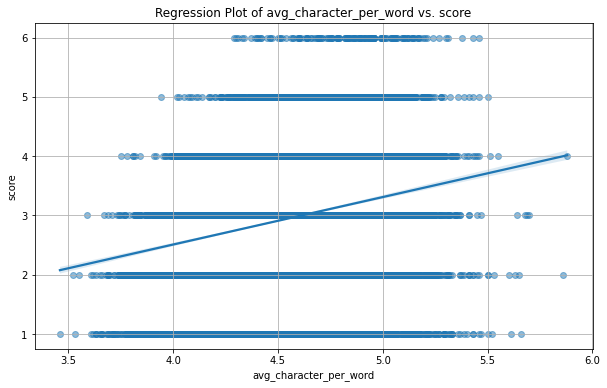

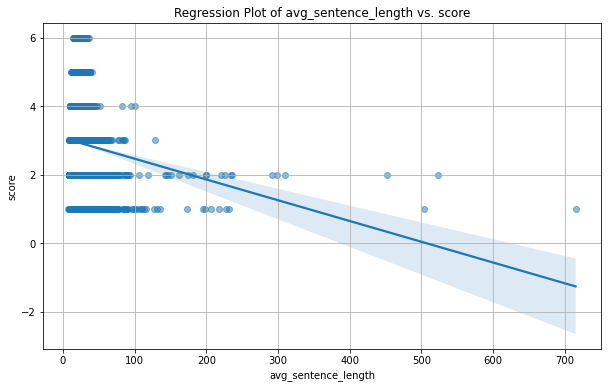

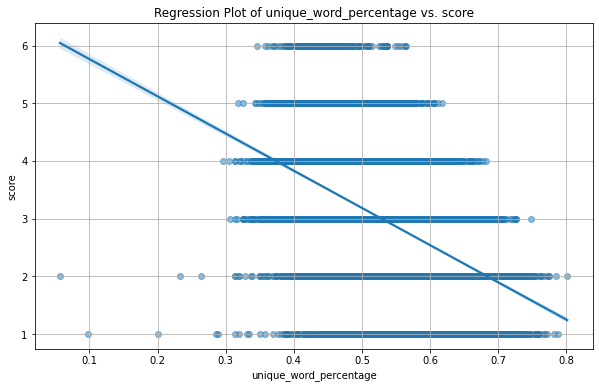

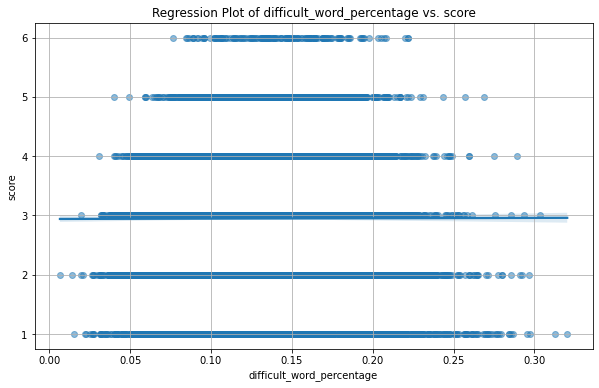

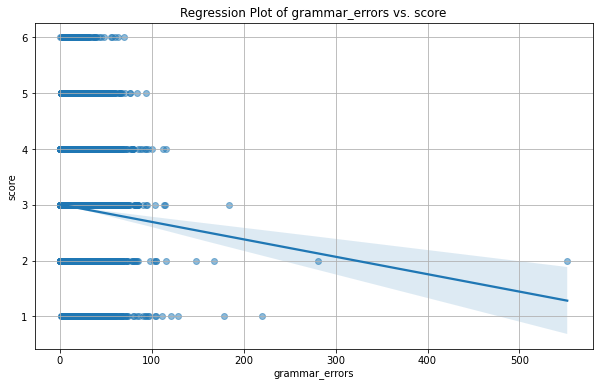

In [4]:
def apply_parallel(df, func):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        return list(executor.map(func, df['full_text']))

lt = LanguageTool('en-US')

stats_methods = {
    'syllable_count': textstat.syllable_count,
    'lexicon_count': textstat.lexicon_count,
    'sentence_count': textstat.sentence_count,
    'char_count': textstat.char_count,

    'flesch_reading_ease': textstat.flesch_reading_ease,
    'flesch_kincaid_grade': textstat.flesch_kincaid_grade,
    'smog_index': textstat.smog_index,
    'coleman_liau_index': textstat.coleman_liau_index,
    'automated_readability_index': textstat.automated_readability_index,
    'dale_chall_readability_score': textstat.dale_chall_readability_score,
    'difficult_words': textstat.difficult_words,
    'linsear_write_formula': textstat.linsear_write_formula,
    'gunning_fog': textstat.gunning_fog,
    'fernandez_huerta': textstat.fernandez_huerta,
    'szigriszt_pazos': textstat.szigriszt_pazos,
    'gutierrez_polini': textstat.gutierrez_polini,
    'crawford': textstat.crawford,
    'gulpease_index': textstat.gulpease_index,
    'osman': textstat.osman,

    'avg_character_per_word': textstat.avg_character_per_word,
    'avg_sentence_length': textstat.avg_sentence_length,

    'unique_word_percentage': lambda x: len(set(x.split())) / len(x.split()),
    'difficult_word_percentage': lambda x: textstat.difficult_words(x) / textstat.lexicon_count(x),

    'grammar_errors': lambda x: len(lt.check(x))
}

for name, func in stats_methods.items():
    train_data[name] = apply_parallel(train_data,func)
    
    plt.figure(figsize=(10, 6))
    sns.regplot(data=train_data, x=name, y='score', scatter_kws={'alpha':0.5})
    plt.title(f'Regression Plot of {name} vs. score')
    plt.xlabel(name)
    plt.ylabel('score')
    plt.grid(True)
    plt.show()

In [5]:
predictor = MultiModalPredictor(label='score', eval_metric='quadratic_kappa').fit(train_data=train_data[['score', 'full_text']])

No path specified. Models will be saved in: "AutogluonModels/ag-20240416_033357"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #38~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov  2 18:01:13 UTC 2
CPU Count:          30
Pytorch Version:    2.0.1
CUDA Version:       12.2
Memory Avail:       177.90 GB / 196.56 GB (90.5%)
Disk Space Avail:   8589934570.05 GB / 8589934592.00 GB (100.0%)
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	6 unique label values:  [3, 4, 2, 1, 5, 6]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and 

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 60: 'val_quadratic_kappa' reached 0.70543 (best 0.70543), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_033357/epoch=0-step=60.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 121: 'val_quadratic_kappa' reached 0.73939 (best 0.73939), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_033357/epoch=0-step=121.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 182: 'val_quadratic_kappa' reached 0.73799 (best 0.73939), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_033357/epoch=1-step=182.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 243: 'val_quadratic_kappa' reached 0.79876 (best 0.79876), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_033357/epoch=1-step=243.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 304: 'val_quadratic_kappa' reached 0.78610 (best 0.79876), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_033357/epoch=2-step=304.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 365: 'val_quadratic_kappa' reached 0.79030 (best 0.79876), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_033357/epoch=2-step=365.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 426: 'val_quadratic_kappa' reached 0.79999 (best 0.79999), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_033357/epoch=3-step=426.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 487: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 548: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 609: 'val_quadratic_kappa' reached 0.79886 (best 0.79999), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_033357/epoch=4-step=609.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 670: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 731: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 792: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 853: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 914: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 975: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 8, global step 1036: 'val_quadratic_kappa' was not in top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/home/ubuntu/fs/AutogluonModels/ag-20240416_033357")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [6]:
predictor_len = MultiModalPredictor(label='score', eval_metric='quadratic_kappa').fit(train_data=train_data[['score', 'full_text', 'lexicon_count']])

No path specified. Models will be saved in: "AutogluonModels/ag-20240416_050040"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #38~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov  2 18:01:13 UTC 2
CPU Count:          30
Pytorch Version:    2.0.1
CUDA Version:       12.2
Memory Avail:       173.66 GB / 196.56 GB (88.3%)
Disk Space Avail:   8589934562.28 GB / 8589934592.00 GB (100.0%)
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	6 unique label values:  [3, 4, 2, 1, 5, 6]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and 

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 60: 'val_quadratic_kappa' reached 0.66140 (best 0.66140), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_050040/epoch=0-step=60.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 121: 'val_quadratic_kappa' reached 0.75555 (best 0.75555), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_050040/epoch=0-step=121.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 182: 'val_quadratic_kappa' reached 0.78374 (best 0.78374), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_050040/epoch=1-step=182.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 243: 'val_quadratic_kappa' reached 0.80119 (best 0.80119), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_050040/epoch=1-step=243.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 304: 'val_quadratic_kappa' reached 0.77613 (best 0.80119), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_050040/epoch=2-step=304.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 365: 'val_quadratic_kappa' reached 0.78967 (best 0.80119), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_050040/epoch=2-step=365.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 426: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 487: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 548: 'val_quadratic_kappa' reached 0.79218 (best 0.80119), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_050040/epoch=4-step=548.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 609: 'val_quadratic_kappa' reached 0.79147 (best 0.80119), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_050040/epoch=4-step=609.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 670: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 731: 'val_quadratic_kappa' reached 0.79771 (best 0.80119), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_050040/epoch=5-step=731.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 792: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 853: 'val_quadratic_kappa' reached 0.79639 (best 0.80119), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_050040/epoch=6-step=853.ckpt' as top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/home/ubuntu/fs/AutogluonModels/ag-20240416_050040")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [7]:
predictor_len_gram = MultiModalPredictor(label='score', eval_metric='quadratic_kappa').fit(train_data=train_data[['score', 'full_text', 'lexicon_count', 'grammar_errors']])

No path specified. Models will be saved in: "AutogluonModels/ag-20240416_053833"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #38~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov  2 18:01:13 UTC 2
CPU Count:          30
Pytorch Version:    2.0.1
CUDA Version:       12.2
Memory Avail:       170.78 GB / 196.56 GB (86.9%)
Disk Space Avail:   8589934571.28 GB / 8589934592.00 GB (100.0%)
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	6 unique label values:  [3, 4, 2, 1, 5, 6]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and 

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 60: 'val_quadratic_kappa' reached 0.73160 (best 0.73160), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_053833/epoch=0-step=60.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 121: 'val_quadratic_kappa' reached 0.77335 (best 0.77335), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_053833/epoch=0-step=121.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 182: 'val_quadratic_kappa' reached 0.77415 (best 0.77415), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_053833/epoch=1-step=182.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 243: 'val_quadratic_kappa' reached 0.78148 (best 0.78148), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_053833/epoch=1-step=243.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 304: 'val_quadratic_kappa' reached 0.77914 (best 0.78148), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_053833/epoch=2-step=304.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 365: 'val_quadratic_kappa' reached 0.80469 (best 0.80469), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_053833/epoch=2-step=365.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 426: 'val_quadratic_kappa' reached 0.80741 (best 0.80741), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_053833/epoch=3-step=426.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 487: 'val_quadratic_kappa' reached 0.79715 (best 0.80741), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_053833/epoch=3-step=487.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 548: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 609: 'val_quadratic_kappa' reached 0.80537 (best 0.80741), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_053833/epoch=4-step=609.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 670: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 731: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 792: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 853: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 914: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 975: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 8, global step 1036: 'val_quadratic_kappa' was not in top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/home/ubuntu/fs/AutogluonModels/ag-20240416_053833")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [8]:
predictor_len_gram_noMM = TabularPredictor(label='score', eval_metric='quadratic_kappa').fit(train_data=train_data[['score', 'full_text', 'lexicon_count', 'grammar_errors']])

No path specified. Models will be saved in: "AutogluonModels/ag-20240416_062211"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240416_062211"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #38~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov  2 18:

In [41]:
predictor_len_gram = MultiModalPredictor(label='score', eval_metric='quadratic_kappa').fit(
    train_data=train_data[[
        'score',
        'full_text',
        'syllable_count',
        'lexicon_count',
        'sentence_count',
        'grammar_errors',
        'char_count',
        'smog_index',
        'coleman_liau_index',
        'difficult_words',
        'crawford',
        'avg_character_per_word',
        'avg_sentence_length',
        'unique_word_percentage',
        'difficult_word_percentage'
    ]]
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240416_083351"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #38~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov  2 18:01:13 UTC 2
CPU Count:          30
Pytorch Version:    2.0.1
CUDA Version:       12.2
Memory Avail:       169.24 GB / 196.56 GB (86.1%)
Disk Space Avail:   8589934565.46 GB / 8589934592.00 GB (100.0%)
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	6 unique label values:  [3, 4, 2, 1, 5, 6]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and 

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 60: 'val_quadratic_kappa' reached 0.70306 (best 0.70306), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_083351/epoch=0-step=60.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 121: 'val_quadratic_kappa' reached 0.77372 (best 0.77372), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_083351/epoch=0-step=121.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 182: 'val_quadratic_kappa' reached 0.74715 (best 0.77372), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_083351/epoch=1-step=182.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 243: 'val_quadratic_kappa' reached 0.78745 (best 0.78745), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_083351/epoch=1-step=243.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 304: 'val_quadratic_kappa' reached 0.80232 (best 0.80232), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_083351/epoch=2-step=304.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 365: 'val_quadratic_kappa' reached 0.80764 (best 0.80764), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_083351/epoch=2-step=365.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 426: 'val_quadratic_kappa' reached 0.81299 (best 0.81299), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_083351/epoch=3-step=426.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 487: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 548: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 609: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 670: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 731: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 792: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 853: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 914: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 975: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 8, global step 1036: 'val_quadratic_kappa' was not in top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/home/ubuntu/fs/AutogluonModels/ag-20240416_083351")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [42]:
predictor_len_gram = MultiModalPredictor(label='score', eval_metric='quadratic_kappa').fit(
    train_data=train_data.drop(['essay_id'], axis=1)
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240416_091702"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #38~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov  2 18:01:13 UTC 2
CPU Count:          30
Pytorch Version:    2.0.1
CUDA Version:       12.2
Memory Avail:       169.13 GB / 196.56 GB (86.0%)
Disk Space Avail:   8589934560.51 GB / 8589934592.00 GB (100.0%)
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	6 unique label values:  [3, 4, 2, 1, 5, 6]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and 

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 60: 'val_quadratic_kappa' reached 0.74471 (best 0.74471), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_091702/epoch=0-step=60.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 121: 'val_quadratic_kappa' reached 0.73628 (best 0.74471), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_091702/epoch=0-step=121.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 182: 'val_quadratic_kappa' reached 0.77824 (best 0.77824), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_091702/epoch=1-step=182.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 243: 'val_quadratic_kappa' reached 0.79752 (best 0.79752), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_091702/epoch=1-step=243.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 304: 'val_quadratic_kappa' reached 0.79599 (best 0.79752), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_091702/epoch=2-step=304.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 365: 'val_quadratic_kappa' reached 0.80200 (best 0.80200), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_091702/epoch=2-step=365.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 426: 'val_quadratic_kappa' reached 0.80950 (best 0.80950), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_091702/epoch=3-step=426.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 487: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 548: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 609: 'val_quadratic_kappa' reached 0.80715 (best 0.80950), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_091702/epoch=4-step=609.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 670: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 731: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 792: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 853: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 914: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 975: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 8, global step 1036: 'val_quadratic_kappa' was not in top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/home/ubuntu/fs/AutogluonModels/ag-20240416_091702")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [43]:
predictor_len_gram = MultiModalPredictor(label='score', eval_metric='quadratic_kappa').fit(
    train_data=train_data
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240416_100020"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #38~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Nov  2 18:01:13 UTC 2
CPU Count:          30
Pytorch Version:    2.0.1
CUDA Version:       12.2
Memory Avail:       168.45 GB / 196.56 GB (85.7%)
Disk Space Avail:   8589934560.51 GB / 8589934592.00 GB (100.0%)
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	6 unique label values:  [3, 4, 2, 1, 5, 6]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and 

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 0, global step 60: 'val_quadratic_kappa' reached 0.74071 (best 0.74071), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_100020/epoch=0-step=60.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 0, global step 121: 'val_quadratic_kappa' reached 0.74507 (best 0.74507), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_100020/epoch=0-step=121.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 182: 'val_quadratic_kappa' reached 0.78533 (best 0.78533), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_100020/epoch=1-step=182.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 1, global step 243: 'val_quadratic_kappa' reached 0.80105 (best 0.80105), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_100020/epoch=1-step=243.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 304: 'val_quadratic_kappa' reached 0.80914 (best 0.80914), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_100020/epoch=2-step=304.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 365: 'val_quadratic_kappa' reached 0.80077 (best 0.80914), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_100020/epoch=2-step=365.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 426: 'val_quadratic_kappa' reached 0.81102 (best 0.81102), saving model to '/home/ubuntu/fs/AutogluonModels/ag-20240416_100020/epoch=3-step=426.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 3, global step 487: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 548: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 4, global step 609: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 670: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 731: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 792: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 853: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 914: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 975: 'val_quadratic_kappa' was not in top 3


Validation: 0it [00:00, ?it/s]

Epoch 8, global step 1036: 'val_quadratic_kappa' was not in top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/home/ubuntu/fs/AutogluonModels/ag-20240416_100020")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [ ]:
features = [
    'grammar_errors', 'syllable_count', 'lexicon_count', 'sentence_count', 'char_count',
    'flesch_reading_ease', 'flesch_kincaid_grade', 'smog_index', 'coleman_liau_index', 
    'automated_readability_index', 'dale_chall_readability_score', 'difficult_words',
    'linsear_write_formula', 'gunning_fog', 'fernandez_huerta', 'szigriszt_pazos',
    'gutierrez_polini', 'crawford', 'gulpease_index', 'osman',
    'avg_character_per_word', 'avg_sentence_length', 'unique_word_percentage', 'difficult_word_percentage'
]

search_space = {feature: tune.choice([0, 1]) for feature in features}

def train_model(config):
    selected_features = [feature for feature in features if config[feature] == 1]
    
    selected_features.extend(['score', 'full_text'])
    
    m = MultiModalPredictor(label='score', eval_metric='quadratic_kappa', enable_progress_bar=False).fit(train_data=train_data[selected_features])
    
    return m.fit_summary()['val_quadratic_kappa']

tuner = tune.Tuner(
    tune.with_resources(train_model,
    resources={"gpu": 1}),
    param_space=search_space,
)

results = tuner.fit()

2024-04-16 19:32:48,660	WARNING worker.py:2037 -- Warning: The actor ImplicitFunc is very large (37 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
(pid=92769) /home/ubuntu/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
(pid=92769)   from pandas.core import (
(pid=92769) /usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
(pid=92769)   warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
(pid=92769) /home/ubuntu/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.12.1-git20200711.33e2d80-dfsg1-0.6 is an invalid version and will not be supported in a future releas